In [148]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [149]:
# make dataframe from csv
bank_df = pd.read_csv("bank-full_2.csv")
bank_df.head()

,Unnamed: 0,index,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact,duration_sec,campaign,pdays,previous,poutcome,subscription,date,weekday
0,0,0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05,Monday
1,1,1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05,Monday
2,2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05,Monday
3,3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05,Monday
4,4,4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05,Monday


In [150]:
bank_df.isnull().values.any()

False

In [151]:
print(f"Duplicate entries: {bank_df.duplicated().sum()}")

Duplicate entries: 0


In [152]:
bank_df['age'].nunique()

77

In [153]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object']).columns)
bank_list

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact',
 'poutcome',
 'subscription',
 'date',
 'weekday']

In [154]:
thing =bank_df[bank_list].nunique()
thing

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
poutcome            4
subscription        2
date              561
weekday             7
dtype: int64

In [155]:
bank_list_binary = ['credit_default','housing_loan','personal_loan','subscription']


In [156]:
# changing data type of binary choices from object to bool
for x in bank_list_binary:
    bank_df[x]=bank_df[x]=="yes"
bank_df[bank_list].nunique()

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
poutcome            4
subscription        2
date              561
weekday             7
dtype: int64

In [157]:
# dropping uneeded columns
bank_df.drop('index',axis=1, inplace=True)

In [158]:
# change date to datetime format
bank_df['date']=pd.to_datetime(bank_df['date'])

# create data
dates = bank_df['date']

# calculate unix datetime
bank_df['date']=(dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# binning the date column and dropping date
# bank_df['date_bins'] = pd.cut(bank_df['date'], 10)
# bank_df.drop('date', axis=1, inplace= True)


In [159]:

# binning continous columns
bin_list=['age', 'date']

for i in bin_list:
    bank_df[i+'_bins'] = pd.cut(bank_df[i], 10)
    bank_df.drop(i, axis=1, inplace= True)

# binning clumped columns
bin_list2=[ 'balance', 'duration_sec']

for i in bin_list2:
    bank_df[i+'_bins'] = pd.qcut(bank_df[i], q=4, duplicates='drop')
    bank_df.drop(i, axis=1, inplace= True)

bin_list3=['campaign', 'pdays']

for i in bin_list3:
    bank_df[i+'_bins'] = pd.cut(bank_df[i], 4)
    bank_df.drop(i, axis=1, inplace= True)

In [160]:
# bank_df.previous_bins.value_counts()

In [161]:
bank_df.nunique()

Unnamed: 0           45211
job                     12
marital                  3
education                4
credit_default           2
housing_loan             2
personal_loan            2
contact                  3
previous                41
poutcome                 4
subscription             2
weekday                  7
age_bins                10
date_bins               10
balance_bins             4
duration_sec_bins        4
campaign_bins            4
pdays_bins               4
dtype: int64

propbaly should run factoranalysis.
or dimensionality reductions via principal componet analysis.

In [162]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object','category']).columns)
bank_list

['job',
 'marital',
 'education',
 'contact',
 'poutcome',
 'weekday',
 'age_bins',
 'date_bins',
 'balance_bins',
 'duration_sec_bins',
 'campaign_bins',
 'pdays_bins']

In [163]:
bank_df[bank_list].nunique()

job                  12
marital               3
education             4
contact               3
poutcome              4
weekday               7
age_bins             10
date_bins            10
balance_bins          4
duration_sec_bins     4
campaign_bins         4
pdays_bins            4
dtype: int64

In [164]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(bank_df[bank_list]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(bank_list)
encode_df.head()

c:\Users\rab_b\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,"duration_sec_bins_(180.0, 319.0]","duration_sec_bins_(319.0, 4918.0]","campaign_bins_(0.938, 16.5]","campaign_bins_(16.5, 32.0]","campaign_bins_(32.0, 47.5]","campaign_bins_(47.5, 63.0]","pdays_bins_(-1.872, 217.0]","pdays_bins_(217.0, 435.0]","pdays_bins_(435.0, 653.0]","pdays_bins_(653.0, 871.0]"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [165]:
# Merge the two DataFrames together and drop the Country column
bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


C:\Users\rab_b\AppData\Local\Temp\ipykernel_21204\2310923932.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


In [166]:
bank_df.drop('Unnamed: 0',axis=1, inplace=True)
bank_df

,credit_default,housing_loan,personal_loan,previous,subscription,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,"duration_sec_bins_(180.0, 319.0]","duration_sec_bins_(319.0, 4918.0]","campaign_bins_(0.938, 16.5]","campaign_bins_(16.5, 32.0]","campaign_bins_(32.0, 47.5]","campaign_bins_(47.5, 63.0]","pdays_bins_(-1.872, 217.0]","pdays_bins_(217.0, 435.0]","pdays_bins_(435.0, 653.0]","pdays_bins_(653.0, 871.0]"
0,False,True,False,0,False,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,True,False,0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,False,True,True,0,False,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,False,0,False,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,False,False,False,0,False,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45207,False,False,False,0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45208,False,False,False,3,True,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45209,False,False,False,0,False,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [167]:
bank_df.dtypes

credit_default                   bool
housing_loan                     bool
personal_loan                    bool
previous                        int64
subscription                     bool
                               ...   
campaign_bins_(47.5, 63.0]    float64
pdays_bins_(-1.872, 217.0]    float64
pdays_bins_(217.0, 435.0]     float64
pdays_bins_(435.0, 653.0]     float64
pdays_bins_(653.0, 871.0]     float64
Length: 74, dtype: object

In [168]:
# set up data x and y
y = bank_df.subscription
X = bank_df.drop(columns="subscription")

In [169]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [170]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

In [171]:
X_scaled= pd.DataFrame(X_scaled)

In [172]:
X_scaled.columns=X.columns
X_scaled

,credit_default,housing_loan,personal_loan,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,"duration_sec_bins_(180.0, 319.0]","duration_sec_bins_(319.0, 4918.0]","campaign_bins_(0.938, 16.5]","campaign_bins_(16.5, 32.0]","campaign_bins_(32.0, 47.5]","campaign_bins_(47.5, 63.0]","pdays_bins_(-1.872, 217.0]","pdays_bins_(217.0, 435.0]","pdays_bins_(435.0, 653.0]","pdays_bins_(653.0, 871.0]"
0,-0.134556,0.892601,-0.436183,-0.299175,-0.360559,-0.526347,-0.186436,-0.166346,1.950609,-0.230312,...,1.728245,-0.574671,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
1,-0.134556,0.892601,-0.436183,-0.299175,-0.360559,-0.526347,-0.186436,-0.166346,-0.512660,-0.230312,...,-0.578622,-0.574671,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
2,-0.134556,0.892601,2.292616,-0.299175,-0.360559,-0.526347,5.363765,-0.166346,-0.512660,-0.230312,...,-0.578622,-0.574671,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
3,-0.134556,0.892601,-0.436183,-0.299175,-0.360559,1.899887,-0.186436,-0.166346,-0.512660,-0.230312,...,-0.578622,-0.574671,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
4,-0.134556,-1.120322,-0.436183,-0.299175,-0.360559,-0.526347,-0.186436,-0.166346,-0.512660,-0.230312,...,1.728245,-0.574671,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-0.134556,-1.120322,-0.436183,-0.299175,-0.360559,-0.526347,-0.186436,-0.166346,-0.512660,-0.230312,...,-0.578622,1.740125,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
45207,-0.134556,-1.120322,-0.436183,-0.299175,-0.360559,-0.526347,-0.186436,-0.166346,-0.512660,4.341942,...,-0.578622,1.740125,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
45208,-0.134556,-1.120322,-0.436183,1.276209,-0.360559,-0.526347,-0.186436,-0.166346,-0.512660,4.341942,...,-0.578622,1.740125,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601
45209,-0.134556,-1.120322,-0.436183,-0.299175,-0.360559,1.899887,-0.186436,-0.166346,-0.512660,-0.230312,...,-0.578622,1.740125,0.101683,-0.096524,-0.028748,-0.013303,0.300365,-0.292357,-0.054386,-0.032601


In [173]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=100, random_state=1)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred_test = log_classifier.predict(X_test_scaled)
y_pred_train = log_classifier.predict(X_train_scaled)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 0.9037100389288664
Precision: 0.6717630195891066
Recall: 0.3529116465863454
Test set metrics:
Accuracy: 0.9024152879766434
Precision: 0.6372282608695652
Recall: 0.3593869731800766


In [174]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=25, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# evaluate training
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')

# Evaluate the model
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training Score: 0.9901203255868821
Training set metrics:
Accuracy: 0.9901203255868821
Precision: 0.9787457360272894
Recall: 0.9362449799196787
Test set metrics:
Accuracy: 0.8958683535344599
Precision: 0.5680851063829787
Recall: 0.4091954022988506


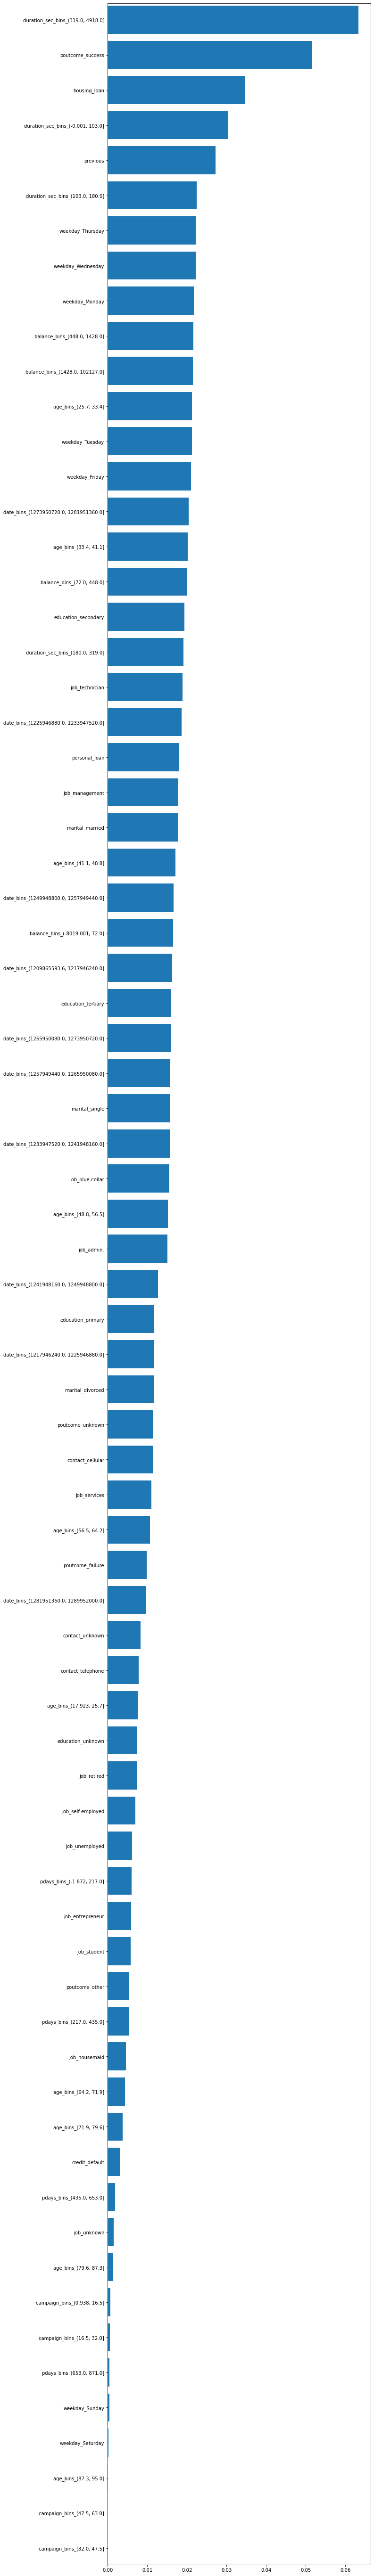

In [175]:
features = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,100)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()